# Coding Applications in Medicine: Data Science - Part 2

Module adapted from Kaggle: https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression/notebook

Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets

## Introduction

Data Science is a multidisciplinary field that integrates computation, math/statistics, and domain knowledge to understand the world and solve problems. 

The data science lifecycle consists of:
1. Question/problem formulation
2. Data acquisition and cleaning
3. Exploratory data analysis and visualization
4. Prediction and inference

In this notebook, we will explore a sample data on medical insurance and practice statistical analysis and visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind

from sklearn.preprocessing import LabelEncoder

## Data Visualization

In [2]:
insuranceDF = pd.read_csv("data/insurance.csv")
insuranceDF["smoker numerical"] = (insuranceDF["smoker"] == 'yes').astype(int)

insuranceDF

,age,sex,bmi,children,smoker,region,charges,smoker numerical
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
# TODO: line plot for relationship between pairs of numerical variables
# Use seaborn lineplot

In [ ]:
# TODO: scatter plot for relationship between pairs of numerical variables
# Use seaborn scatterplot

In [ ]:
# TODO: bar chart / bar plots for distribution of qualitative (categorical) variable
# Use seaborn countplot

In [ ]:
# TODO: histogram for distribution of quantitative variable
# Use seaborn histplot, kde parameter for density curve

In [ ]:
# TODO: box plot for comparing distribution
# Use seaborn boxplot

In [ ]:
# TODO: violin plot for comparing distribution
# Use seaborn violin plot

## Linear Regression

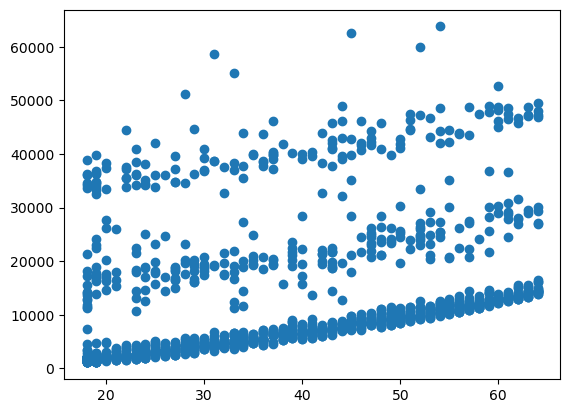

In [3]:
plt.scatter(data=insuranceDF, x="age", y="charges")

In [4]:
linData1_tr, linData1_te = train_test_split(insuranceDF, test_size=0.1, random_state=42)
linData1_tr.reset_index(inplace=True, drop=True)
linData1_te.reset_index(inplace=True, drop=True)

linTraining1X = linData1_tr[["age"]].to_numpy()
linTraining1Y = linData1_tr["charges"].to_numpy()

linModel1 = LinearRegression(fit_intercept=True)
linModel1.fit(linTraining1X, linTraining1Y)

linModel1.intercept_, linModel1.coef_

(3426.437782561261, array([252.37092343]))

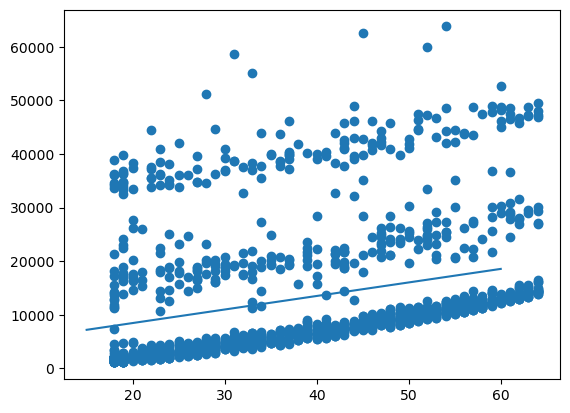

In [5]:
plt.scatter(data=insuranceDF, x="age", y="charges")
plt.plot(np.linspace(15, 60, 600), linModel1.predict(np.reshape(np.linspace(15, 60, 600), (-1, 1))))

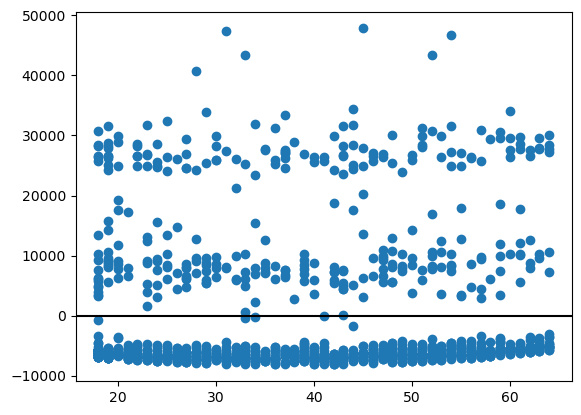

In [6]:
linResidual1 = linData1_tr["charges"] - linModel1.predict(linData1_tr[["age"]].to_numpy())
plt.scatter(linData1_tr["age"], linResidual1)
plt.axhline(0, c='black')

In [7]:
linModel1.score(linData1_te[["age"]].to_numpy(), linData1_te["charges"].to_numpy())

0.12425654514465179

In [8]:
linData2_tr, linData2_te = train_test_split(insuranceDF, test_size=0.1, random_state=42)
linData2_tr.reset_index(inplace=True, drop=True)
linData2_te.reset_index(inplace=True, drop=True)

linTraining2X = linData2_tr.drop(["sex", "charges", "smoker", "region"], axis=1).to_numpy()
linTraining2Y = linData2_tr["charges"].to_numpy()

linModel2 = LinearRegression(fit_intercept=True)
linModel2.fit(linTraining2X, linTraining2Y)

linModel2.intercept_, linModel2.coef_

(-11840.39365374851,
 array([  259.6571255 ,   313.49871717,   445.32168678, 23892.06142254]))

In [9]:
linModel2.score(linData2_te.drop(["sex", "charges", "smoker", "region"], axis=1).to_numpy(), linData2_te["charges"].to_numpy())

0.7632788495940076

## Logistic Regression

In [10]:
insuranceDF["smoker numerical"] = (insuranceDF["smoker"] == 'yes').astype(int)
insuranceDF

,age,sex,bmi,children,smoker,region,charges,smoker numerical
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


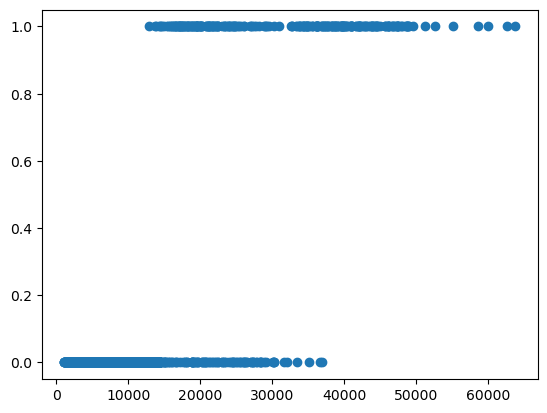

In [11]:
plt.scatter(data=insuranceDF, x="charges", y="smoker numerical")

<Axes: xlabel='charges', ylabel='Count'>

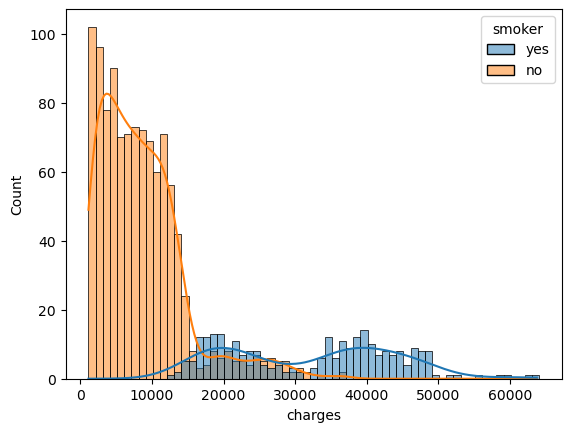

In [12]:
sns.histplot(data=insuranceDF, x="charges", hue="smoker", binwidth=1000, kde=True)

In [13]:
logData_tr, logData_te = train_test_split(insuranceDF, test_size=0.1, random_state=42)
logData_tr.reset_index(inplace=True, drop=True)
logData_te.reset_index(inplace=True, drop=True)

logTrainingX = logData_tr[["charges"]].to_numpy()
logTrainingY = logData_tr["smoker numerical"].to_numpy()

logModel = LogisticRegression(fit_intercept=True)
logModel.fit(logTrainingX, logTrainingY)

logModel.intercept_, logModel.coef_

(array([-5.66377158]), array([[0.00025285]]))

<Axes: xlabel='charges', ylabel='smoker numerical'>

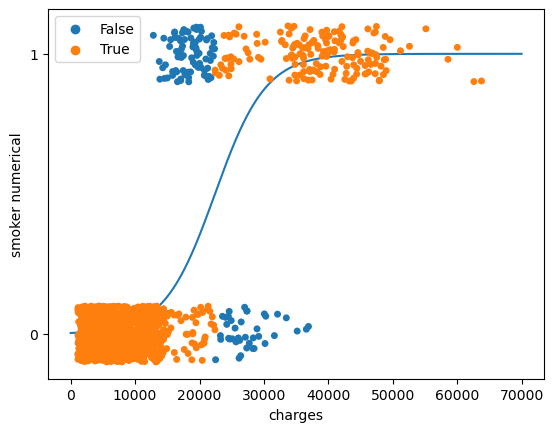

In [14]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

log_theta_0 = logModel.intercept_[0]
log_theta_1 = logModel.coef_[0]

log_smoke_pred = np.round(sigmoid(log_theta_0 + log_theta_1 * logData_tr["charges"]))

sns.stripplot(x=logData_tr["charges"], y=logData_tr["smoker numerical"], jitter=0.1, orient='h', hue= log_smoke_pred==logData_tr["smoker numerical"]).invert_yaxis()

sns.lineplot(x=np.linspace(0, 70000, 1000), y=sigmoid(log_theta_0 + log_theta_1 * np.linspace(0, 70000, 1000)))

In [15]:
logModel.predict([[30000]])

array([1])

In [16]:
logModel.score(logData_te[["charges"]].to_numpy(), logData_te["smoker numerical"].to_numpy())

0.9029850746268657

## Hypothesis Testing

<Axes: xlabel='charges', ylabel='Count'>

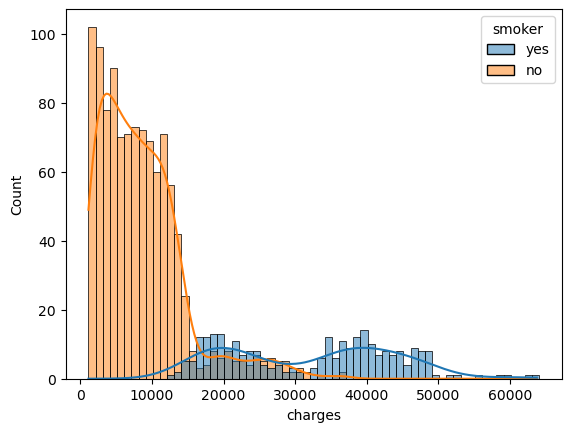

In [18]:
sns.histplot(data=insuranceDF, x="charges", hue="smoker", binwidth=1000, kde=True)

<Axes: xlabel='smoker', ylabel='charges'>

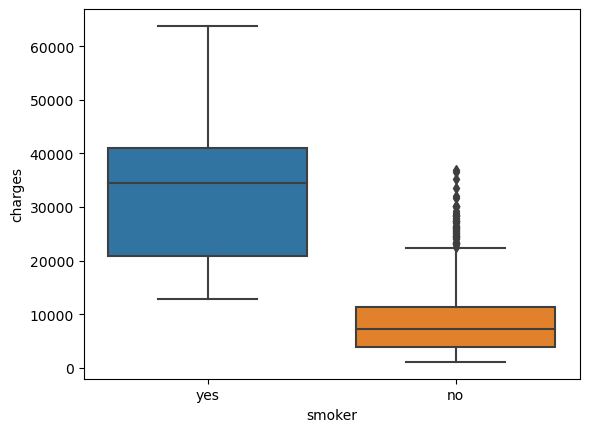

In [17]:
sns.boxplot(data=insuranceDF, x="smoker", y="charges")

In [19]:
smokerGroup = insuranceDF[insuranceDF['smoker']=='yes']
nonsmokerGroup = insuranceDF[insuranceDF['smoker']=='no']

ttest_ind(smokerGroup["charges"], nonsmokerGroup["charges"])

Ttest_indResult(statistic=46.66492117272371, pvalue=8.271435842179101e-283)